Saving runway.png to runway.png
Image loaded successfully


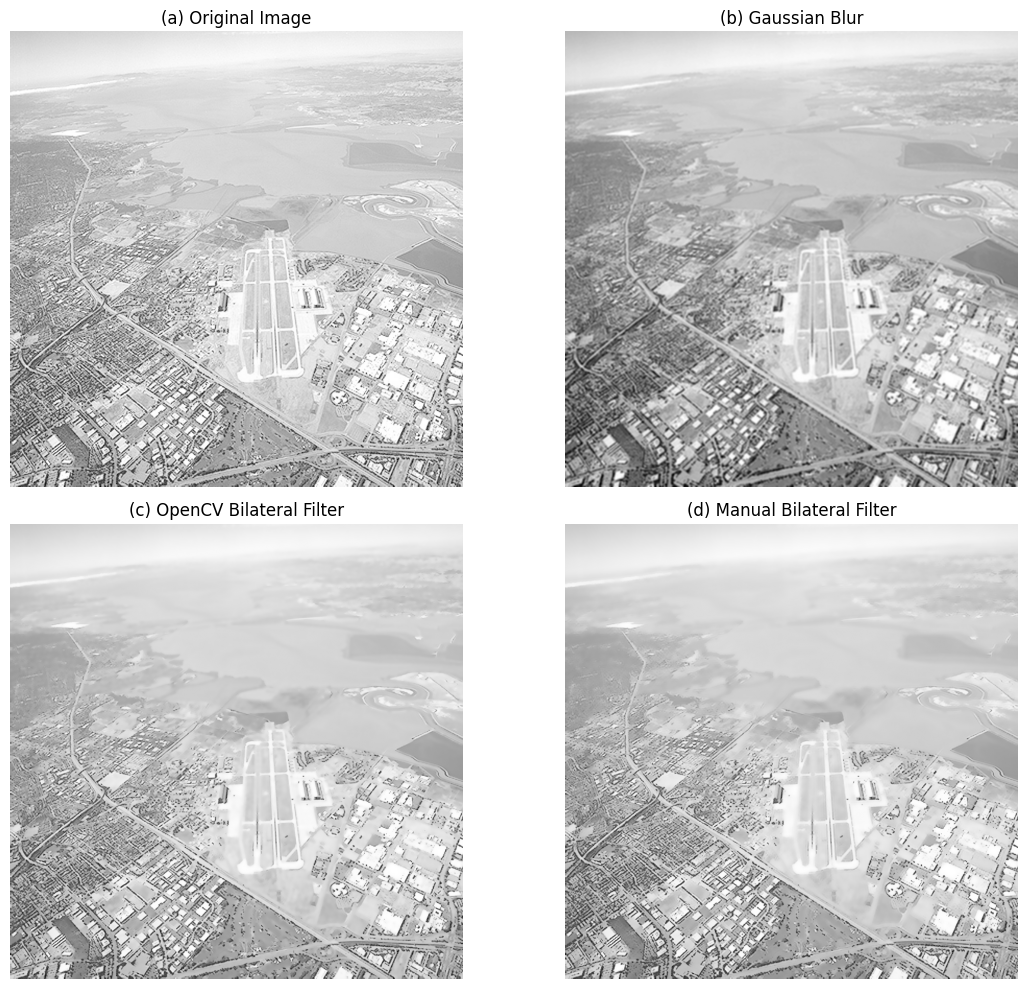

In [35]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# (a) Manual Bilateral Filter Function
def bilateral_manual(img, d, sigma_s, sigma_r):
    pad = d // 2
    h, w = img.shape
    out = np.zeros((h, w), dtype=np.float32)

    # Pad image
    padded = np.pad(img.astype(np.float32), pad, mode='reflect')

    # Precompute spatial Gaussian
    X, Y = np.meshgrid(np.arange(d), np.arange(d))
    spatial = np.exp(-((X-pad)**2 + (Y-pad)**2) / (2 * sigma_s**2))

    for i in range(h):
        for j in range(w):
            window = padded[i:i+d, j:j+d]
            center = window[pad, pad]

            # Range Gaussian
            range_w = np.exp(-((window - center)**2) / (2 * sigma_r**2))

            # Combined weights
            weights = spatial * range_w

            out[i, j] = np.sum(weights * window) / np.sum(weights)

    return out.astype(np.uint8)

# Upload image
uploaded = files.upload()
img_name = list(uploaded.keys())[0]
gray = cv.imread(img_name, cv.IMREAD_GRAYSCALE)

if gray is None:
    print("ERROR: Image not loaded")
else:
    print("Image loaded successfully")

    # Parameters
    d = 9
    sigma_s = 9
    sigma_r = 25

    # (b) Gaussian smoothing
    gauss = cv.GaussianBlur(gray, (5,5), 1.5)

    # (c) OpenCV Bilateral
    bilat_cv = cv.bilateralFilter(gray, d, sigma_r, sigma_s)

    # (d) Manual Bilateral
    bilat_manual = bilateral_manual(gray, d, sigma_s, sigma_r)

    # (a) Original image
    original = gray.copy()

    # Display results: (a)(b)(c)(d)
    plt.figure(figsize=(12, 10))

    # (a) Manual bilateral function
    plt.subplot(2, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('(a) Original Image')
    plt.axis('off')

    #(a) Manual bilateral function
    plt.subplot(2, 2, 2)
    plt.imshow(gauss, cmap='gray')
    plt.title('(b) Gaussian Blur')
    plt.axis('off')

    #(c) OpenCV bilateralFilter
    plt.subplot(2, 2, 3)
    plt.imshow(bilat_cv, cmap='gray')
    plt.title('(c) OpenCV Bilateral Filter')
    plt.axis('off')

    #  (d) My implementation
    plt.subplot(2, 2, 4)
    plt.imshow(bilat_manual, cmap='gray')
    plt.title('(d) Manual Bilateral Filter')
    plt.axis('off')

    plt.tight_layout()
    plt.show()